In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import joblib
import re
import sys
sys.path.insert(0, '../')
import numpy as np

# Datasets
from aif360.datasets import MEPSDataset19
from aif360.datasets import MEPSDataset20
from aif360.datasets import MEPSDataset21
from aif360.datasets import GermanDataset
# Fairness metrics
from aif360.metrics import BinaryLabelDatasetMetric

# Explainers
from aif360.explainers import MetricTextExplainer

# Scalers
from sklearn.preprocessing import StandardScaler


# Bias mitigation techniques
from aif360.algorithms.preprocessing import Reweighing,DisparateImpactRemover
from aif360.algorithms.preprocessing import LFR
from aif360.algorithms.preprocessing import OptimPreproc


c:\Users\srinivas\anaconda3\Lib\site-packages\torch\_functorch\deprecated.py:61: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.vmap is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.vmap instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_deprecated('vmap', 'torch.vmap')


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
dataset_orig_panel19 = MEPSDataset19()

In [4]:
dataset_orig_panel19_train = MEPSDataset19()

In [29]:
type(dataset_orig_panel19_train)

aif360.datasets.meps_dataset_panel19_fy2015.MEPSDataset19

In [5]:
dataset_orig_panel19_train.features

array([[53.  ,  1.  , 25.93, ...,  0.  ,  1.  ,  0.  ],
       [56.  ,  1.  , 20.42, ...,  0.  ,  1.  ,  0.  ],
       [23.  ,  1.  , 53.12, ...,  0.  ,  1.  ,  0.  ],
       ...,
       [ 2.  ,  1.  , -1.  , ...,  0.  ,  1.  ,  0.  ],
       [54.  ,  0.  , 43.97, ...,  0.  ,  1.  ,  0.  ],
       [73.  ,  0.  , 42.68, ...,  0.  ,  1.  ,  0.  ]])

In [6]:
sens_ind = 0
sens_attr = dataset_orig_panel19_train.protected_attribute_names[sens_ind]
unprivileged_groups = [{sens_attr: v} for v in
                    dataset_orig_panel19_train.unprivileged_protected_attributes[sens_ind]]
privileged_groups = [{sens_attr: v} for v in
                    dataset_orig_panel19_train.privileged_protected_attributes[sens_ind]]

In [7]:
sens_attr

'RACE'

In [8]:
privileged_groups

[{'RACE': 1.0}]

In [9]:
unprivileged_groups

[{'RACE': 0.0}]

In [10]:
dataset_orig_panel19_train

               instance weights features                                    \
                                         protected attribute                 
                                     AGE                RACE  PCS42  MCS42   
instance names                                                               
0                  21854.981705     53.0                 1.0  25.93  58.47   
1                  18169.604822     56.0                 1.0  20.42  26.57   
3                  17191.832515     23.0                 1.0  53.12  50.33   
4                  20261.485463      3.0                 1.0  -1.00  -1.00   
5                      0.000000     27.0                 0.0  -1.00  -1.00   
...                         ...      ...                 ...    ...    ...   
16573               4111.315754     25.0                 0.0  56.71  62.39   
16574               5415.228173     25.0                 0.0  56.71  62.39   
16575               3896.116219      2.0                 1.0  -1

In [11]:
metric_orig_panel19_train = BinaryLabelDatasetMetric(
        dataset_orig_panel19_train,
        unprivileged_groups=unprivileged_groups,
        privileged_groups=privileged_groups)

In [12]:
explainer_orig_panel19_train = MetricTextExplainer(metric_orig_panel19_train)


In [15]:
test_name=['Mean Difference','Consistency','Statistical Parity Difference','Disparate Impact']
test_results=[explainer_orig_panel19_train.mean_difference(),
              explainer_orig_panel19_train.consistency(),
              explainer_orig_panel19_train.statistical_parity_difference(),
              explainer_orig_panel19_train.disparate_impact()]

In [16]:
test_results

['Mean difference (mean label value on unprivileged instances - mean label value on privileged instances): -0.13507447726478142',
 'Consistency (Zemel, et al. 2013): [0.83665193]',
 'Statistical parity difference (probability of favorable outcome for unprivileged instances - probability of favorable outcome for privileged instances): -0.13507447726478142',
 'Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 0.49826823461176517']

In [17]:
RW = Reweighing(unprivileged_groups=unprivileged_groups,privileged_groups=privileged_groups)
dataset_transf_panel19_train_rw = RW.fit_transform(dataset_orig_panel19_train)

In [18]:
metric_transf_panel19_train = BinaryLabelDatasetMetric(
dataset_transf_panel19_train_rw,
unprivileged_groups=unprivileged_groups,
privileged_groups=privileged_groups)
explainer_transf_panel19_train = MetricTextExplainer(metric_transf_panel19_train)
test_results_rw=[explainer_transf_panel19_train.mean_difference()
               ,explainer_transf_panel19_train.consistency()
               ,explainer_transf_panel19_train.statistical_parity_difference()
               ,explainer_transf_panel19_train.disparate_impact()]

In [19]:
test_results_rw

['Mean difference (mean label value on unprivileged instances - mean label value on privileged instances): -2.7755575615628914e-17',
 'Consistency (Zemel, et al. 2013): [0.83665193]',
 'Statistical parity difference (probability of favorable outcome for unprivileged instances - probability of favorable outcome for privileged instances): -2.7755575615628914e-17',
 'Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 0.9999999999999999']

In [22]:
test_results

['Mean difference (mean label value on unprivileged instances - mean label value on privileged instances): -0.13507447726478142',
 'Consistency (Zemel, et al. 2013): [0.83665193]',
 'Statistical parity difference (probability of favorable outcome for unprivileged instances - probability of favorable outcome for privileged instances): -0.13507447726478142',
 'Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 0.49826823461176517']

In [20]:
test_results_rw

['Mean difference (mean label value on unprivileged instances - mean label value on privileged instances): -2.7755575615628914e-17',
 'Consistency (Zemel, et al. 2013): [0.83665193]',
 'Statistical parity difference (probability of favorable outcome for unprivileged instances - probability of favorable outcome for privileged instances): -2.7755575615628914e-17',
 'Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 0.9999999999999999']

In [21]:
features = dataset_transf_panel19_train_rw.features
label = dataset_transf_panel19_train_rw.labels.ravel()  # Flatten the label array if necessary
weights = dataset_transf_panel19_train_rw.instance_weights
feature_names = dataset_transf_panel19_train_rw.feature_names
df_rw = pd.DataFrame(features, columns=feature_names)
df_rw['label'] = label
df_rw['weights'] = weights


In [22]:
df_rw

,AGE,RACE,PCS42,MCS42,K6SUM42,REGION=1,REGION=2,REGION=3,REGION=4,SEX=1,...,POVCAT=1,POVCAT=2,POVCAT=3,POVCAT=4,POVCAT=5,INSCOV=1,INSCOV=2,INSCOV=3,label,weights
0,53.0,1.0,25.93,58.47,3.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,17459.483776
1,56.0,1.0,20.42,26.57,17.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,14515.313940
2,23.0,1.0,53.12,50.33,7.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18465.607681
3,3.0,1.0,-1.00,-1.00,-1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21762.696983
4,27.0,0.0,-1.00,-1.00,-1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15825,25.0,0.0,56.71,62.39,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3727.042408
15826,25.0,0.0,56.71,62.39,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4909.081729
15827,2.0,1.0,-1.00,-1.00,-1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4184.786789
15828,54.0,0.0,43.97,42.45,24.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4427.370919


In [23]:
features = dataset_orig_panel19_train.features
label = dataset_orig_panel19_train.labels
feature_names = dataset_orig_panel19_train.feature_names
dataset_orig_panel19_train_df = pd.DataFrame(features, columns=feature_names)
dataset_orig_panel19_train_df['label'] = label
dataset_orig_panel19_train_df

,AGE,RACE,PCS42,MCS42,K6SUM42,REGION=1,REGION=2,REGION=3,REGION=4,SEX=1,...,EMPST=4,POVCAT=1,POVCAT=2,POVCAT=3,POVCAT=4,POVCAT=5,INSCOV=1,INSCOV=2,INSCOV=3,label
0,53.0,1.0,25.93,58.47,3.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,56.0,1.0,20.42,26.57,17.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,23.0,1.0,53.12,50.33,7.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.0,1.0,-1.00,-1.00,-1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,27.0,0.0,-1.00,-1.00,-1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15825,25.0,0.0,56.71,62.39,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15826,25.0,0.0,56.71,62.39,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15827,2.0,1.0,-1.00,-1.00,-1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15828,54.0,0.0,43.97,42.45,24.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


c:\Users\srinivas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.8654453569172458, Training Log Loss: 0.3231973192817746
Testing Accuracy: 0.8597599494630449, Testing Log Loss: 0.33654418113825585


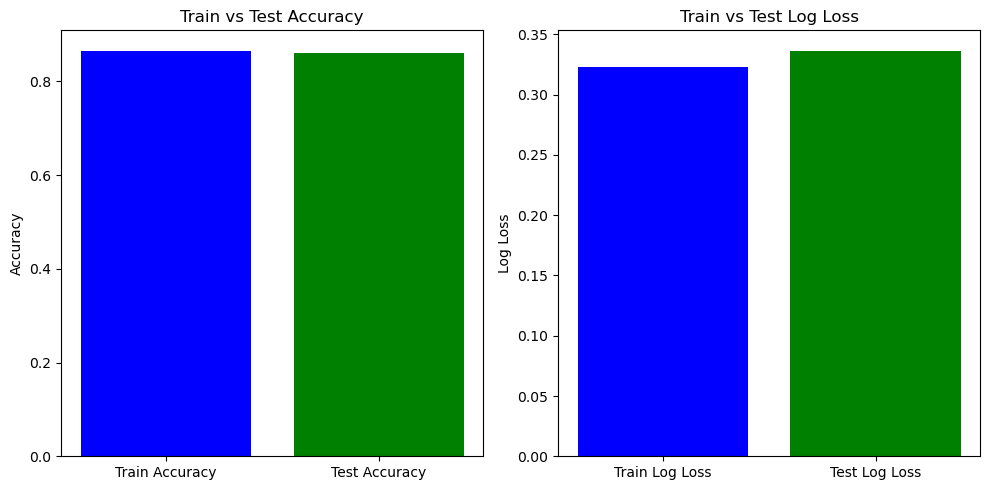

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss

# Assuming 'df' is your Pandas DataFrame with features, 'label', and 'weights' columns
df=dataset_orig_panel19_train_df
# Split the DataFrame into features, labels, and weights

X = df.drop(['label'], axis=1)
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression()

# Train the model using the sample_weight parameter
# We need to extract the corresponding weights for the training samples
train_indices = X_train.index
# train_weights = weights[train_indices]

model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Probability predictions for log loss calculation
y_train_pred_proba = model.predict_proba(X_train)
y_test_pred_proba = model.predict_proba(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate log loss
train_loss = log_loss(y_train, y_train_pred_proba)
test_loss = log_loss(y_test, y_test_pred_proba)

# Print errors and losses
print(f"Training Accuracy: {train_accuracy}, Training Log Loss: {train_loss}")
print(f"Testing Accuracy: {test_accuracy}, Testing Log Loss: {test_loss}")

# Plotting
plt.figure(figsize=(10, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')

# Log Loss plot
plt.subplot(1, 2, 2)
plt.bar(['Train Log Loss', 'Test Log Loss'], [train_loss, test_loss], color=['blue', 'green'])
plt.ylabel('Log Loss')
plt.title('Train vs Test Log Loss')

plt.tight_layout()
plt.show()


In [28]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
import plotly.figure_factory as ff

# Assuming 'df' is your Pandas DataFrame with features and 'label' columns
df = dataset_orig_panel19_train_df  # Replace with your actual DataFrame

# Split the DataFrame into features and labels
X = df.drop(['label'], axis=1)
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Probability predictions for log loss calculation
y_train_pred_proba = model.predict_proba(X_train)
y_test_pred_proba = model.predict_proba(X_test)

# Calculate accuracy and log loss
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_loss = log_loss(y_train, y_train_pred_proba)
test_loss = log_loss(y_test, y_test_pred_proba)

# Generate confusion matrix for test data
cm = confusion_matrix(y_test, y_test_pred)
cm_figure = ff.create_annotated_heatmap(z=cm, x=['Predicted Negative', 'Predicted Positive'], y=['Actual Negative', 'Actual Positive'], colorscale='Viridis')

# Bar graph for accuracy
accuracy_fig = go.Figure()
accuracy_fig.add_trace(go.Bar(x=['Train Accuracy', 'Test Accuracy'],
                              y=[train_accuracy, test_accuracy],
                              marker_color=['blue', 'green'],
                              text=[f"{train_accuracy:.2%}", f"{test_accuracy:.2%}"],
                              textposition='auto'))

accuracy_fig.update_layout(title='Train vs Test Accuracy',
                           xaxis_title='Dataset',
                           yaxis_title='Accuracy',
                           template='plotly_dark',
                           showlegend=False)

# Bar graph for log loss
loss_fig = go.Figure()
loss_fig.add_trace(go.Bar(x=['Train Log Loss', 'Test Log Loss'],
                          y=[train_loss, test_loss],
                          marker_color=['blue', 'green'],
                          text=[f"{train_loss:.4f}", f"{test_loss:.4f}"],
                          textposition='auto'))

loss_fig.update_layout(title='Train vs Test Log Loss',
                       xaxis_title='Dataset',
                       yaxis_title='Log Loss',
                       template='plotly_dark',
                       showlegend=False)

# Show plots
accuracy_fig.show()
loss_fig.show()
cm_figure.show()


c:\Users\srinivas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss

# Assuming 'df' is your Pandas DataFrame with features, 'label', and 'weights' columns

# Split the DataFrame into features, labels, and weights
X = df_rw.drop(['label', 'weights'], axis=1)
y = df_rw['label']
weights = df_rw['weights']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model_rw = LogisticRegression()

# Train the model using the sample_weight parameter
# We need to extract the corresponding weights for the training samples
train_indices = X_train.index
train_weights = weights[train_indices]

model_rw.fit(X_train, y_train, sample_weight=train_weights)

# Predictions
y_train_pred = model_rw.predict(X_train)
y_test_pred = model_rw.predict(X_test)

# Probability predictions for log loss calculation
y_train_pred_proba = model_rw.predict_proba(X_train)
y_test_pred_proba = model_rw.predict_proba(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate log loss
train_loss = log_loss(y_train, y_train_pred_proba)
test_loss = log_loss(y_test, y_test_pred_proba)

# Print errors and losses
print(f"Training Accuracy: {train_accuracy}, Training Log Loss: {train_loss}")
print(f"Testing Accuracy: {test_accuracy}, Testing Log Loss: {test_loss}")

# Plotting
plt.figure(figsize=(10, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')

# Log Loss plot
plt.subplot(1, 2, 2)
plt.bar(['Train Log Loss', 'Test Log Loss'], [train_loss, test_loss], color=['blue', 'green'])
plt.ylabel('Log Loss')
plt.title('Train vs Test Log Loss')

plt.tight_layout()
plt.show()


KeyError: 'weights'